# MAXIMIZING REVENUE FOR DRIVERS THROUGH PAYMENT TYPE

In [ ]:
# Importint Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/Dataset/10M_MAXIMIZING REVENUE_FOR_DRIVERS_THROUGH_PAYMENT_TYPE.csv"
df = pd.read_csv(url)
df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5


In [ ]:
def check(self):
    print("\nShape:")
    print(self.shape)
    print("\nData Types:")
    print(self.info())
    print("\nCheck NaN:")
    print(self.isnull().sum())
    print("\nCheck Duplicates:")
    print(self.duplicated().sum())

check(df)



Shape:
(10000000, 18)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 1.3+ GB
None

Check NaN:
VendorID                 87163
tpep_pickup_datetim

In [ ]:
#Extract Particular Columns
df = df[['passenger_count','payment_type','fare_amount','trip_distance','tpep_pickup_datetime', 'tpep_dropoff_datetime']]

df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,tpep_pickup_datetime,tpep_dropoff_datetime
0,1.0,1.0,6.0,1.2,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM
1,1.0,1.0,7.0,1.2,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM
2,1.0,1.0,6.0,0.6,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM


# Features Extract

In [ ]:
# Changing Data types
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9912837 entries, 0 to 9999999
Data columns (total 6 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   passenger_count        float64       
 1   payment_type           float64       
 2   fare_amount            float64       
 3   trip_distance          float64       
 4   tpep_pickup_datetime   datetime64[ns]
 5   tpep_dropoff_datetime  datetime64[ns]
dtypes: datetime64[ns](2), float64(4)
memory usage: 529.4 MB


In [ ]:
# Making a column to calculate Duration
df["Duration"] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['Duration'] = df['Duration'].dt.total_seconds() / 60  # Minutes

df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333


In [ ]:
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

df.head(3)

In [ ]:
# NaN Data Cleaning
df.dropna()
df.drop_duplicates()

check(df)

,0
passenger_count,0
payment_type,0
fare_amount,0
trip_distance,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0


In [ ]:
check(df)


Shape:
(9912837, 5)

Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 9912837 entries, 0 to 9999999
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  float64
 1   payment_type     float64
 2   fare_amount      float64
 3   trip_distance    float64
 4   Duration         float64
dtypes: float64(5)
memory usage: 453.8 MB
None

Check NaN:
passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
Duration           0
dtype: int64

Check Duplicates:
5725349


In [ ]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333


In [ ]:
df.shape

(4187488, 5)

In [ ]:
# Changing Data Type "Float" to "Int" type for Calculate
df['passenger_count'] = df['passenger_count'].astype("int64")
df['payment_type'] = df['payment_type'].astype("int64")

df.head(3)


,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333


In [ ]:
# Founding outlier.
df['passenger_count'].value_counts()

# normalize = True ==> to convert as percentage.

,count
passenger_count,
1,2387675
2,803707
3,287537
5,275869
6,175919
4,158371
0,98318
7,42
8,26


In [ ]:
# Founding outlier in Percentage.
print(df['payment_type'].value_counts())
print()
print(df['payment_type'].value_counts(normalize=True))

payment_type
1.0    7382856
2.0    2450102
3.0      51390
4.0      28488
5.0          1
Name: count, dtype: int64

payment_type
1.0    7.447773e-01
2.0    2.471646e-01
3.0    5.184187e-03
4.0    2.873849e-03
5.0    1.008793e-07
Name: proportion, dtype: float64


In [ ]:
df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333


In [ ]:
# Remove Outlier
df = df[df['payment_type'] < 3] # -3, -2, -1, 0, 1, 2, 3
df = df[df['passenger_count'] > 0 & (df['passenger_count'] < 2)]

print(df['payment_type'].value_counts())
print()
print(df['passenger_count'].value_counts())

payment_type
1    2765440
2    1262584
Name: count, dtype: int64

passenger_count
1    2342353
2     793190
3     284947
5     275081
6     175503
4     156859
7         42
8         26
9         23
Name: count, dtype: int64


In [ ]:
# using Z_Scores for remove outlier # Alternative

from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(df['payment_type'])

# Filter using Z-score threshold
df = df[(abs(z_scores) < 3)]

# Display normalized value counts
df['payment_type'].value_counts()


,count
payment_type,
1,2765440
2,1262584


In [ ]:
df.shape # Check Remaining Data by shape.

(4028024, 5)

In [ ]:
df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,1,6.0,1.2,4.800000
1,1,1,7.0,1.2,7.416667
2,1,1,6.0,0.6,6.183333


In [ ]:
# Replace

# df = df[df['payment_type'].isin([1, 2])] # only 2 type
df['payment_type'].replace([1,2],["Card","Cash"],inplace=True)

df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.2,4.800000
1,1,Card,7.0,1.2,7.416667
2,1,Card,6.0,0.6,6.183333


In [ ]:
df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,4.028024e+06,4.028024e+06,4.028024e+06,4.028024e+06
mean,1.946399e+00,1.839862e+01,4.719245e+00,2.557067e+01
std,1.455224e+00,1.517751e+01,4.978980e+00,9.769320e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-9.990667e+03
25%,1.000000e+00,9.000000e+00,1.560000e+00,1.033333e+01
50%,1.000000e+00,1.400000e+01,2.900000e+00,1.643333e+01
75%,2.000000e+00,2.200000e+01,5.800000e+00,2.433333e+01
max,9.000000e+00,4.265000e+03,3.699400e+02,8.525117e+03


In [ ]:
# Remove Negative Values.
df = df[df['fare_amount'] > 0]
df = df[df['passenger_count'] > 0]
df = df[df['Duration'] > 0]
df = df[df['trip_distance'] > 0]

df.describe()

,passenger_count,fare_amount,trip_distance,Duration
count,3.984122e+06,3.984122e+06,3.984122e+06,3.984122e+06
mean,1.952852e+00,1.827641e+01,4.765645e+00,2.561983e+01
std,1.458788e+00,1.460073e+01,4.979924e+00,9.776094e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,9.000000e+00,1.600000e+00,1.040000e+01
50%,1.000000e+00,1.350000e+01,2.920000e+00,1.646667e+01
75%,2.000000e+00,2.200000e+01,5.870000e+00,2.431667e+01
max,9.000000e+00,4.265000e+03,3.699400e+02,8.525117e+03


In [ ]:
df.shape

(3984122, 5)

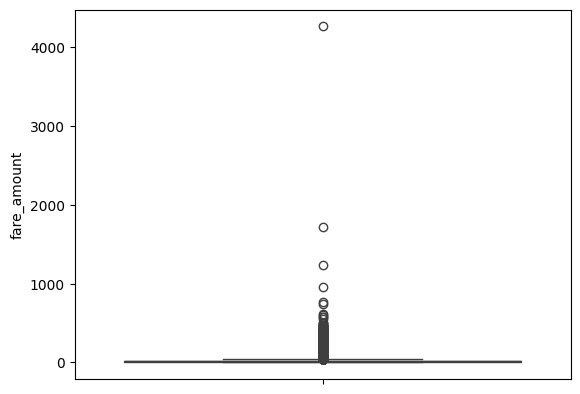

In [ ]:
# Check Outlier
sns.boxplot(df['fare_amount'])
plt.show()

In [ ]:
# Select numeric columns (you can also pick specific ones)
numeric_cols = df.select_dtypes(include=['number']).columns

# Remove outliers using the IQR method for selected columns
for col in numeric_cols:
    Q_1 = df[col].quantile(0.25)              # First quartile (25th percentile)
    Q_3 = df[col].quantile(0.75)              # Third quartile (75th percentile)
    IQR = Q_3 - Q_1                           # Interquartile range

    Lower_bound = Q_1 - (1.5 * IQR)           # Lower bound for detecting outliers
    Upper_bound = Q_3 + (1.5 * IQR)           # Upper bound for detecting outliers

    # Keep only the rows within the bounds (i.e., remove outliers)
    df = df[(df[col] >= Lower_bound) & (df[col] <= Upper_bound)]

# Display the first 3 rows of the cleaned DataFrame
df.head(3)

,passenger_count,payment_type,fare_amount,trip_distance,Duration
0,1,Card,6.0,1.2,4.800000
1,1,Card,7.0,1.2,7.416667
2,1,Card,6.0,0.6,6.183333


In [ ]:
df.shape

(3359209, 5)

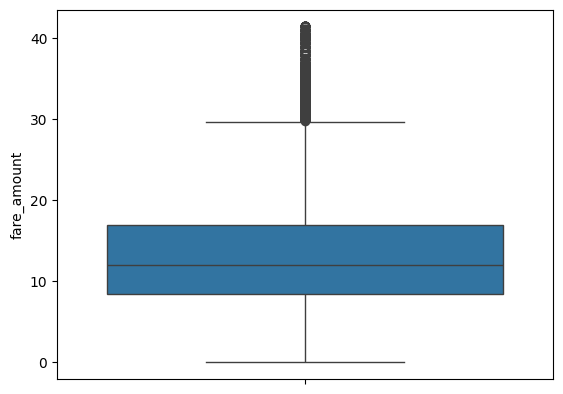

In [ ]:
# Check Outlier
sns.boxplot(df['fare_amount'])
plt.show()

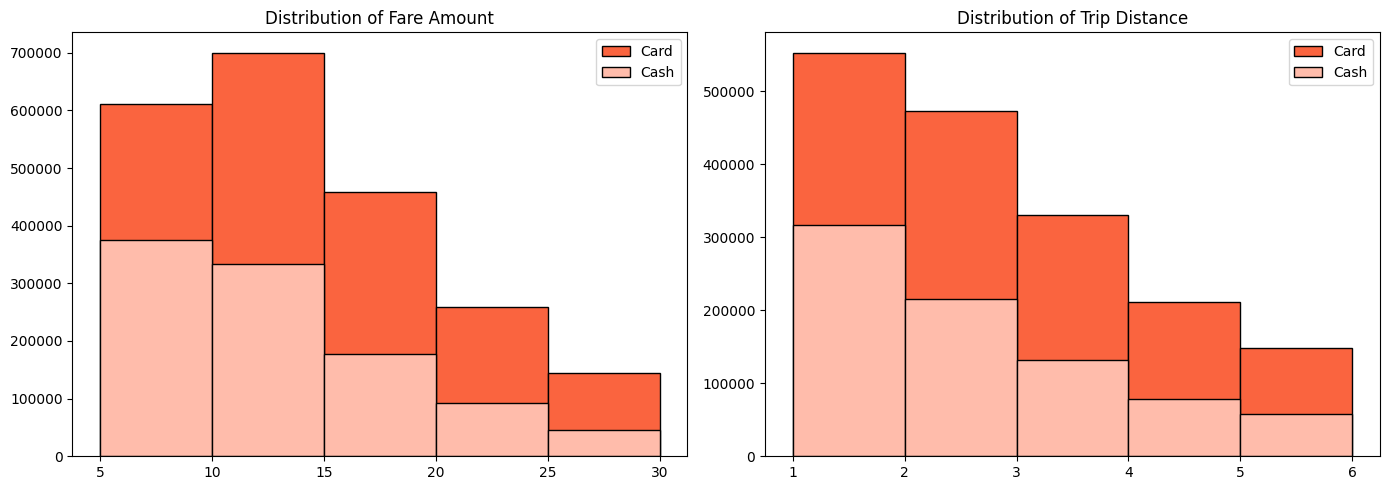

In [ ]:

#  CHANGED: One figure instead of two
plt.figure(figsize=(14, 5))  # Wider canvas for side-by-side plots

#  CHANGED: First subplot (left)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.title("Distribution of Fare Amount")

plt.hist(df[df['payment_type'] == "Card"]['fare_amount'],
         histtype='barstacked', bins=[5,10,15,20,25,30],
         edgecolor='k', color="#FA643F", label="Card")

plt.hist(df[df['payment_type'] == "Cash"]['fare_amount'],
         histtype='barstacked', bins=[5,10,15,20,25,30],
         edgecolor='k', color="#FFBCAB", label="Cash")

plt.legend()


#  CHANGED: Second subplot (right) in same figure
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.title("Distribution of Trip Distance")

plt.hist(df[df['payment_type'] == "Card"]['trip_distance'],
         histtype='barstacked', bins=list(range(1, 7)),
         edgecolor='k', color="#FA643F", label="Card")

plt.hist(df[df['payment_type'] == "Cash"]['trip_distance'],
         histtype='barstacked', bins=list(range(1, 7)),
         edgecolor='k', color="#FFBCAB", label="Cash")

plt.legend()


#  SAME: Styling and layout
sns.set_style("darkgrid")
plt.tight_layout()  # Ensures plots don’t overlap
plt.show()


In [ ]:
# Check mean & std
df.groupby('payment_type').agg({'fare_amount': ['mean','std'],
                           'trip_distance': ['mean', 'std']})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           13.850813  6.337072      3.222320  2.191761
Cash           12.342205  6.026473      2.785745  2.088060

In [ ]:
df['payment_type'].value_counts()

,count
payment_type,
Card,2265776
Cash,1093433


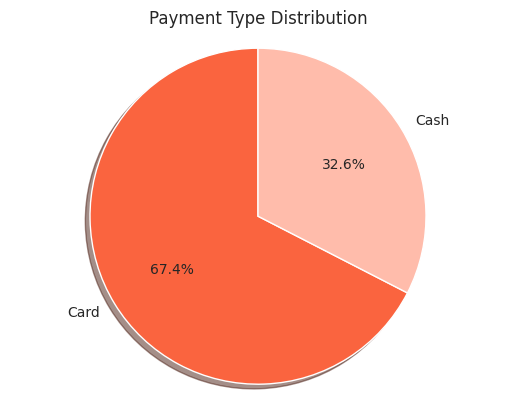

In [ ]:
plt.pie(
    df['payment_type'].value_counts(normalize=True),
    labels=df['payment_type'].value_counts().index,
    startangle=90,
    shadow=True,
    autopct='%1.1f%%',
    colors=["#FA643F", "#FFBCAB"] )

plt.title("Payment Type Distribution")
plt.axis('equal')
plt.show()


In [ ]:
df_5 = df # We will use it for Hypothesis Testing

In [ ]:
# Remove rows where payment_type is ["Card", "Cash"] and passenger_count outlier
df = df[~((df['payment_type'] == 'Card') & (df['passenger_count'] == 7))]
df = df[~((df['payment_type'] == 'Card') & (df['passenger_count'] == 8))]
df = df[~((df['payment_type'] == 'Card') & (df['passenger_count'] == 9))]
df = df[~((df['payment_type'] == 'Cash') & (df['passenger_count'] == 7))]
# Display the filtered DataFrame
df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()


passenger_count
payment_type passenger_count                 
Card         1                        1237149
             2                         458947
             3                         177278
             4                          94822
             5                         181083
             6                         116490
Cash         1                         631398
             2                         220040
             3                          79353
             4                          47472
             5                          70902
             6                          44265

In [ ]:
# Group by 'payment_type' and 'passenger_count', then count the occurrences
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

# Rename the column from 'passenger_count' to 'count' for clarity
passenger_count.rename(columns = {'passenger_count':'count'}, inplace=True)

# Convert the index back to columns so it's easier to work with or plot
# Reset the index to convert group keys into columns
passenger_count.reset_index(inplace=True)

# Display the resulting DataFrame
passenger_count


,payment_type,passenger_count,count
0,Card,1,1237149
1,Card,2,458947
2,Card,3,177278
3,Card,4,94822
4,Card,5,181083
5,Card,6,116490
6,Cash,1,631398
7,Cash,2,220040
8,Cash,3,79353
9,Cash,4,47472


In [ ]:
# Calculate the percentage share of each group relative to the total count
passenger_count['perc'] = (passenger_count['count'] / passenger_count['count'].sum()) * 100

passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1237149,36.828690
1,Card,2,458947,13.662394
2,Card,3,177278,5.277389
3,Card,4,94822,2.822756
4,Card,5,181083,5.390660
5,Card,6,116490,3.467791
6,Cash,1,631398,18.796088
7,Cash,2,220040,6.550371
8,Cash,3,79353,2.362260
9,Cash,4,47472,1.413194


In [ ]:
# Create Transfrom Dataset
df = pd.DataFrame(columns=['payment_type',1,2,3,4,5,6])
df['payment_type'] = ['Card','Cash']
df.iloc[0,1:] = passenger_count.iloc[0:6,-1]
df.iloc[1,1:] = passenger_count.iloc[6:,-1]

df

,payment_type,1,2,3,4,5,6
0,Card,36.82869,13.662394,5.277389,2.822756,5.39066,3.467791
1,Cash,18.796088,6.550371,2.36226,1.413194,2.110682,1.317725


In [ ]:
# Create Transfrom Dataset
# Create a new DataFrame with 'payment_type' and columns for passenger counts (1 to 6 passengers)
df = pd.DataFrame(columns=['payment_type', 1, 2, 3, 4, 5, 6])

# Assign payment types ('Card' and 'Cash') to the 'payment_type' column
df['payment_type'] = ['Card', 'Cash']

# Fill in the first row with the percentage data for the first 6 passenger counts
df.iloc[0, 1:] = passenger_count.iloc[0:6, -1]

# Fill in the second row with the same percentage data for the next payment type
df.iloc[1, 1:] = passenger_count.iloc[6:, -1]

# Display the transformed DataFrame
df


,payment_type,1,2,3,4,5,6
0,Card,36.82869,13.662394,5.277389,2.822756,5.39066,3.467791
1,Cash,18.796088,6.550371,2.36226,1.413194,2.110682,1.317725


##### Explanation:

    df.iloc[1, 1:]:
    This selects the second row (1) of df and all columns from the second column onwards (1:). In other words, it selects all the passenger count columns for the row with payment_type = 'Cash' (since the first row is for 'Card').

    passenger_count.iloc[0:6, -1]:
    This selects the first 6 rows (0:6) and the last column (-1) of the passenger_count DataFrame. The last column in passenger_count contains the percentages for each combination of payment_type and passenger_count.

        0:6: Takes the first 6 passenger counts.

        -1: Refers to the last column, which in this case is the percentage column (perc).

    Assignment:
    It assigns the percentage values from the passenger_count DataFrame to the selected row (df.iloc[1, 1:]) in the newly created df. This means you are filling in the percentage data for payment_type = 'Cash'.

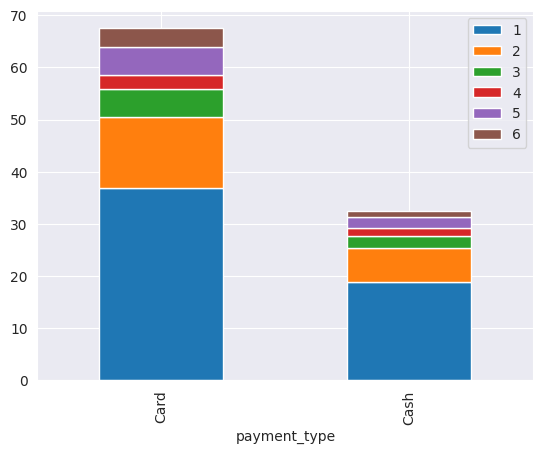

In [ ]:
# Create a Vertical Stacked Bar Chart
df.plot(x='payment_type', kind='bar', stacked=True)
plt.show()


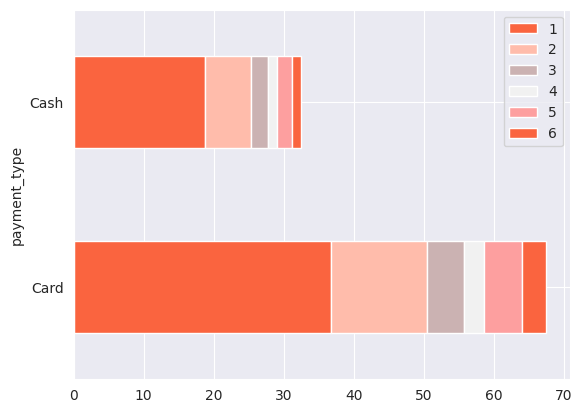

In [ ]:
# Create a Horizontal Stacked Bar Chart to show passenger count distribution by payment type
df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F']
)


plt.show()


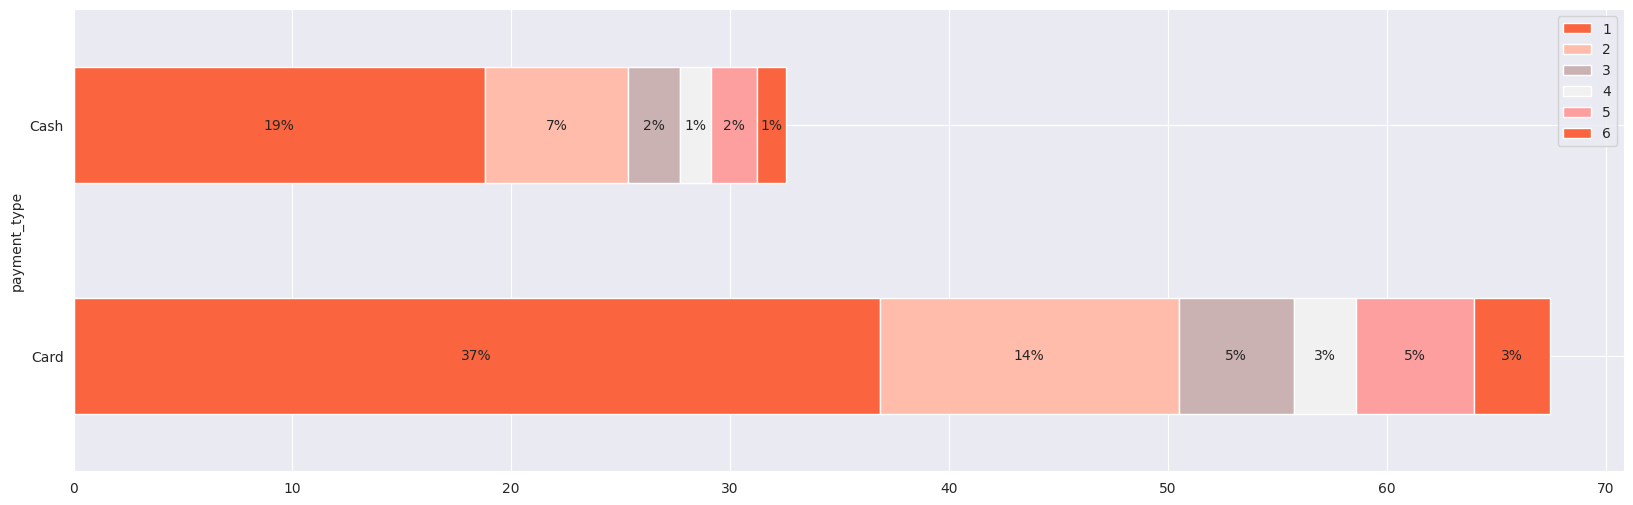

In [ ]:
# Create a figure and axes with specified size
fig, ax = plt.subplots(figsize=(20, 6))

# Plot a stacked horizontal bar chart using DataFrame 'df'
df.plot(
    x='payment_type',
    kind='barh',
    stacked=True,
    color=['#FA643F', '#FFBCAB', '#CBB2B2', '#F1F1F1', '#FD9F9F'],
    ax=ax
)

# Add text labels to each bar segment
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Place a label in the center of each bar segment
    ax.text(
        x + width / 2,
        y + height / 2,
        "{:.0f}%".format(width),
        ha='center',
        va='center'
    )



# Display the plot
plt.show()


# Hypothesis Testing

### Check normal distribution

##### Notes:
The parameter must be a string: line='45' (not line=45).

This line helps visually compare the distribution of your data
against a theoretical normal distribution —
if your points lie close to the line, the data is approximately normal.

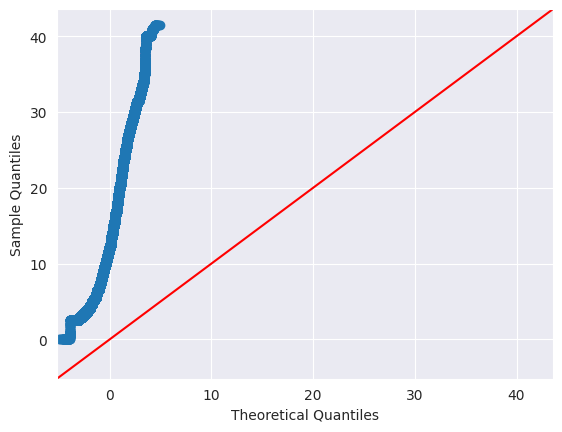

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df_5['fare_amount'], line='45')

# Display the plot
plt.show()


### T Test

### Null hypothesis: There is no defference in average fare betweem customers who use credit cards and customers who use cash.
### Alternative hypothesis: There is defference in average fare between customers who use credit cards and customers who use cash.


In [ ]:
# Extract fare amounts for each payment type to create two independent samples
card_sample = df_5[df_5['payment_type'] == 'Card']['fare_amount']
cash_sample = df_5[df_5['payment_type'] == 'Cash']['fare_amount']

# Perform independent two-sample t-test (Welch's t-test)
T_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var=False)

# Display the test statistic and p-value
print(f"T_statistic: {T_stats:.4f} & P_value: {p_value:.4f}")

# Decision based on significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean fare amounts between Card and Cash payments.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean fare amounts between Card and Cash payments.")


T_statistic: 211.3739 & P_value: 0.0000
Reject the null hypothesis: There is a significant difference in mean fare amounts between Card and Cash payments.
